<a href="https://colab.research.google.com/github/jim-min/gdsc-ai-study/blob/main/week5/5%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GDG 인공지능 기초 5주차 과제**
이번 주차도 어어김없이 퀴즈와 실습으로 구성되어있습니다.

## **<span style="color:green"> [ 퀴즈 ] </span>**

#####  **<span style="color:red"> 1. </span>** Adam 옵티마이저가 다른 옵티마이저(SGD 등)에 비해 가지는 주요 특징은 무엇인가요?

① 매번 일정한 학습률로 가중치를 업데이트한다.  
② 이전 그라디언트를 무시하고 현재 그라디언트만 사용한다.  
③ 매 에포크마다 학습률을 수동으로 조정해야 한다.  
④ 모멘텀과 RMSprop의 장점을 결합하여 학습률을 적응적으로 조절한다.  

4

#####  **<span style="color:red"> 2. </span>** 총 데이터가 30000개 있고 배치 크기는 256입니다. 이 때 epoch = 10일 때, 총 미니배치 경사하강법은 몇 번 일어날까요?

① 1160    
② 1170  
③ 1180  
④ 2560   

3.

ceil(30000 / 256) * 10 하면 1180

##### **<span style="color:red"> 3. </span>** 배치 정규화(Batch Normalization)에서 순전파와 역전파가 다르게 작동하는 이유는 무엇일까요?

① 순전파에서는 미니배치의 통계(평균, 분산)를 사용하지만, 역전파에서는 전체 데이터셋의 통계를 사용하기 때문이다.  
② 순전파에서 입력값을 정규화하기 위해 미니배치 통계를 사용하지만, 역전파에서는 이 통계를 고정된 값으로 취급하고, 그라디언트를 계산하기 때문이다.  
③ 순전파와 역전파에서 사용하는 파라미터가 다르기 때문이다.   
④ 역전파에서 미니배치 통계가 아니라 이전 레이어의 출력값만을 사용하기 때문이다.  

2

##### **<span style="color:red"> 4. </span>** 딥러닝에서 드롭아웃(Dropout)의 주요 목적은 무엇이며, 학습과 테스트 단계에서 어떻게 다르게 작동하나요?

① 파라미터 수를 줄여 계산량을 줄이고, 학습·추론 시 항상 같은 뉴런만 활성화시킨다.  
② 학습 시 일부 뉴런을 무작위로 꺼서 과적합을 줄이며, 추론 시에는 모든 뉴런을 사용하지만 출력을 평균화한다.  
③ 학습과 추론 모두에서 랜덤으로 뉴런을 꺼서 모델이 다양한 경로로 예측하게 한다.  
④ 레이어의 가중치를 정규화하여 학습을 안정화시키는 기술이다.  

2

##### **<span style="color:red"> 5. </span>** 어떤 Fully Connected Neural Network(FNN)는 각 레이어가 다음과 같이 구성되어 있습니다.
##### Linear → BatchNorm → ReLU → Dropout 구조가 사용된 이유를 잘못 설명한 것은 무엇일까요?

① BatchNorm은 입력 분포를 정규화해 ReLU가 보다 안정적으로 동작할 수 있도록 한다.  
② Dropout은 비선형 함수를 통과한 후 일부 출력을 무작위로 제거해 과적합을 방지한다.  
③ BatchNorm은 드롭아웃의 무작위성에 영향을 줄 수 있기 때문에 반드시 앞에 와야 한다.  
④ 이 구조는 학습 안정성과 일반화 성능을 동시에 고려한 전형적인 구성이다.  

3

## **<span style="color:green"> [ 실습 ] </span> 2-layer FNN**
MNIST 데이터라는 손글씨 데이터를 2-layer FNN에 넣고 학습해보는는 실습을 해보겠습니다!

**<span style="color:red"> 1. </span>** 필요한 모듈을 다운받고, 가져옵니다.

In [ ]:
!pip install torch torchvision matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 730.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import random

**<span style="color:red"> 2. </span>** 사용할 하이퍼파라미터들을 설정해주고, MNIST 데이터를 불러옵니다.

In [ ]:
batch_size = 64
learning_rate = 0.01
num_epochs = 5
use_batchnorm = True
use_dropout = True

In [ ]:
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_data = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 483kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.84MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.0MB/s]


**<span style="color:red"> 3. </span>** 사용할 2-layer FNN 모델을 정의합니다.

In [ ]:
# 모델 정의
class SimpleFNN(nn.Module):
    def __init__(self):
        super(SimpleFNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.bn1 = nn.BatchNorm1d(256) if use_batchnorm else nn.Identity()
        self.dropout1 = nn.Dropout(0.5) if use_dropout else nn.Identity()

        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128) if use_batchnorm else nn.Identity()
        self.dropout2 = nn.Dropout(0.5) if use_dropout else nn.Identity()

        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)     # 선형 변환
        x = self.bn1(x)     # 배치 정규화
        x = F.relu(x)
        x = self.dropout1(x)# 드롭아웃웃

        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        return x

**<span style="color:red"> 4. </span>** 모델을 만들고, 사용할 optimizer를 골라줍니다. optimizer별 차이를 보고 싶으시다면, 원하는 optimizer를 선택하시면 됩니다!

In [ ]:
model = SimpleFNN()

optimizer_type = 'sgd'  # 'sgd', 'momentum', 'adam'

# 옵티마이저 선택
if optimizer_type == 'sgd':
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
elif optimizer_type == 'momentum':
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
elif optimizer_type == 'adam':
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

criterion = nn.CrossEntropyLoss()

**<span style="color:red"> 5. </span>** 학습을 진행합니다.

In [ ]:
# 학습
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {total_loss / len(train_loader):.4f}')

Epoch 1, Loss: 0.8391
Epoch 2, Loss: 0.4392
Epoch 3, Loss: 0.3693
Epoch 4, Loss: 0.3316
Epoch 5, Loss: 0.2977


**<span style="color:red">  </span>**  학습을 거듭할수록 loss가 줄어드는게 보입니다.

**<span style="color:red"> 6. </span>** 테스트 데이터를 통해 모델이 어느정도 성능이 나오는지 측정해봅시다.

In [ ]:
# 테스트 정확도
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        pred = output.argmax(dim=1)
        correct += (pred == target).sum().item()
        total += target.size(0)

print(f'Test Accuracy: {100 * correct / total:.2f}%')

Test Accuracy: 95.47%


흑백의 간단한 이미지라 정확도가 꽤 괜찮게 나옵니다. 아마 sgd나 adam이나 어떤 optimizer를 사용해도 정확도는 비슷할겁니다.

**<span style="color:red"> 7. </span>** 테스트 한 데이터들을 시각화 하기 위한 함수를 정의합니다.

In [ ]:
def visualize_random_predictions(model, test_loader, num_images=10):
    model.eval()

    # 모든 이미지와 레이블을 리스트에 모으기
    all_images = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            all_images.append(images)
            all_labels.append(labels)

        # 하나로 합치기
        all_images = torch.cat(all_images)
        all_labels = torch.cat(all_labels)

        # 랜덤 인덱스 선택
        indices = random.sample(range(len(all_images)), num_images)

        outputs = model(all_images)
        _, predicted = torch.max(outputs, 1)

        plt.figure(figsize=(15, 2))
        for i, idx in enumerate(indices):
            img = all_images[idx].numpy().squeeze()
            true_label = all_labels[idx].item()
            pred_label = predicted[idx].item()

            plt.subplot(1, num_images, i + 1)
            plt.imshow(img, cmap='gray')
            color = 'green' if pred_label == true_label else 'red'
            plt.title(f'P:{pred_label}\nT:{true_label}', color=color)
            plt.axis('off')

**<span style="color:red"> 8. </span>** 여러번 누르면서 결과를 확인해보세요!

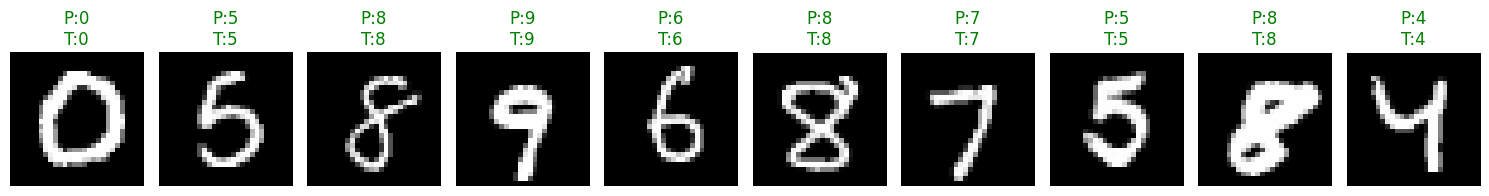

In [ ]:
visualize_random_predictions(model, test_loader, num_images=10)
plt.tight_layout()
plt.show()

분류가 잘 된 것과 잘 안된 것들을 비교해 봅시다

## 5주차 과제 끝!
5주차 과제는 여기까지 입니다!

모두들 수고 많으셨습니다!